![alt text](https://cdn.newsbook.com.mt/wp-content/uploads/2019/03/0f40cb07fbf640d883755f420e91f6ec.jpg)

# Introduction 


### Context 
This dataset is obtained from [Kaggle](https://www.kaggle.com/unsdsn/world-happiness). I have modified the data to contain only data from 2015 to 2017. This report ranks 155 countries by their happiness level through 6 indicators:

- economic production
- social support
- life expectancy 
- freedom 
- absence of corruption
- generosity

The last indicator is dystopia residual. Dystopia residual is "the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country".  Dystopia is a made up country that has the world's least happiest people. This made up country is high in corruption, low in average income, employment, etc. Dystopia residual is used as a benchmark and should be used side-by-side with the happiness score. 
- Low dystopia residual = low level of happiness 
- high dystopia residual = high level of happiness.

### Understanding the column data
- Country
- Happiness rank 
- Happiness score 
 * This is obtained from a sample of population. The survey-taker asked the respondent to rate their happiness from 1 to 10. 
- Economic (GDP per cap)
 * Extend of GDP that contributes to the happiness score
- Family
 * To what extend does family contribute to the happiness score 
- Health
 * Extend of health (life expectancy) contribute to the happiness score 
- Freedom
 * Extend of freedom that contribute to happiness. The freedom here represents the freedom of speech, freedom to pursue what we want, etc
- Trust (Government corruption)
 * Extend of trust with regards to government corruption that contribute to happiness score 
- Generosity 
 * Extend of generosity that contribute to happiness score 
- dystopia residual
- Year

#### Do note:
$ Happiness Score = Economic (GDP per cap) + Family + Health + Freedom + Trust + Generosity + Dystopia Residual $

## Let's get started!

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
# After uploading the file, we are able to see the name of the file saved as "World_Happiness_2015_2017.csv"
# Use pd.read_csv() to read the file and assign it to variable call "data"
url = "D:\Data Science\DATASETS\World_Happiness_2015_2017_.csv"
data = pd.read_csv(url)

# We then use data.head() to see the first 5 rows of data
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


### Looking into data.shape() to see rows and columns
- We should be able to see (470,11) as output. 470 represents number of rows while 11 represents number of columns.
- We then use data.dtypes to identify the type for each column. Type can come in many form: str, int, float, object, etc. 
- The main purpose for this is that we will need to change the type if we want to manipulate data. For instance if my happiness ranking is a string type, I may have issue adding things up or perform statistical analysis on it. I will need to change it to int. This can be done using pandas.DataFrame.astype(). We will change the year column from int to float in the following exercise (Reason: just for you to practise. We will change back to Int after that)


In [3]:
# Then what I do next is look into shape using data.shape(). This will tell me how many rows and columns there are.
data.shape

(470, 11)

In [4]:
# Now lets see data types using data.dtypes
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

In [5]:
# Now lets change the data type of Year from int to float 
data['Year'] = data['Year'].astype('float')

# Now let's check if we did it right
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                             float64
dtype: object

In [6]:
# Have a look at data
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015.0
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015.0
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015.0
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015.0
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015.0


In [7]:
# Yikes! Year in decimals! Let's change it back to int!
data['Year'] = data['Year'].astype('int')

### Looking into null values. There are numerous way you can deal with null, NaN or unknown values.
- Omitting rows with null/NaN values
  * This helps our output to be more robust and accurate
  * However this should only be done when we have sufficient data. If we have more than 50% NaN values, we may not be able to omit the affected rows.
- Replace these NaN and null values with mean or median
 * This saves us the worry for loss of information
 * This does increase our data variance and bias

To identify null values, we use **data.isnull().sum()**
- isnull() returns boolean (True or False). Is this value null? Yes or No?
- sum() calculate the number of True
- For this practice I have personally picked one dataset with no null value. So you should see 0 for each column.

In [8]:
# Lets calculate the number of null values
data.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

## Next up! Plotting!
- Here, we will want to see the relationship among attributes. My favourite way to visualise that is through seaborn's pairplot.
- This can be done using sns.pairplot(). 
 * I then adjust the layout to include a title call "FacetGrid plot", with fontsize of 20. I use adjust to adjust the spacing of margin and plot. You can experiment the number to your favor.
 * Note: If you are using dark theme on google colab you may need to change to light in order to see the axis name. 

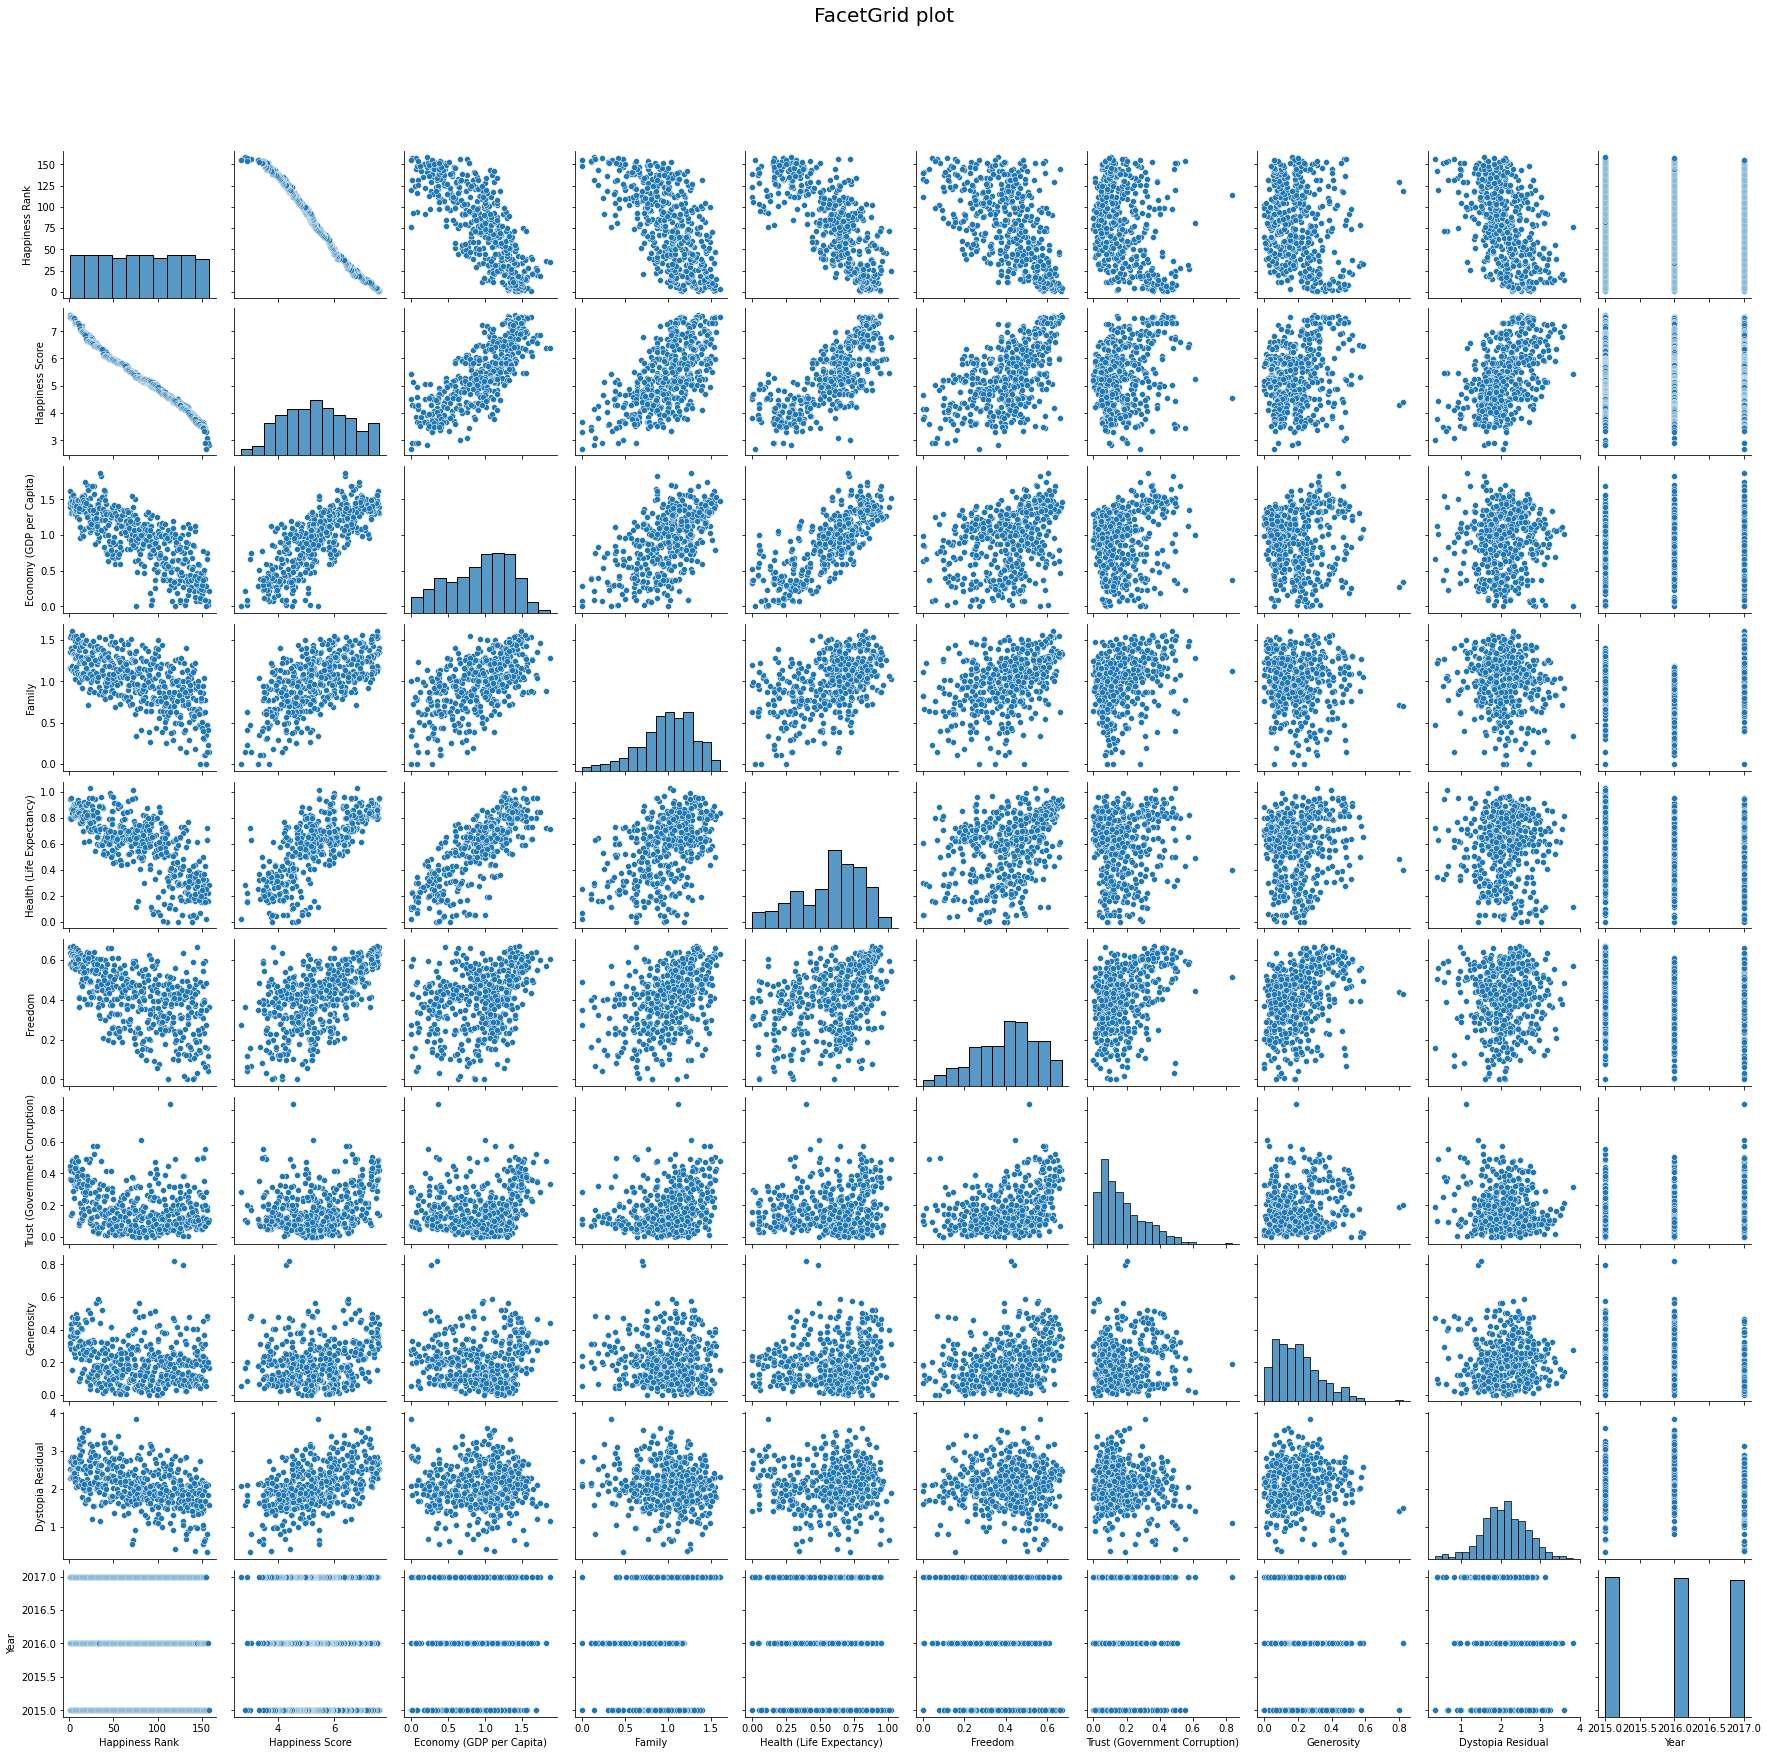

In [9]:
g = sns.pairplot(data)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

## What do we see here?
The plot is messy at first but,
We see two types of plot. 
- Histograms
 * Take some time to look at the x axis and y axis of the histogram. There are the same! This shows the distribution of each attribute.
- Scatter plot
 * This shows the relationship between 2 attributes. We can see a strong linear correlation between Happiness Rank and Happiness Score. That is because the rank is determined by the score. 

What we are interested in finding out is the correlation between happiness score and each attribute. From the plot if we look at the second column from the left (Happiness score on x-axis), we do notice that economic, family and health have positive linear correlation. Well, the truth is what you see may be different from what others see. We need to prove it through some form of numeric values and this tutorial will be focused on that.

## Correlation between Happiness score and economic 

- Assign the required attribute as a list and assign that to a variable
- Use .corr() to find correlation. 


In [10]:
# Creating a list of attributes we want (just copy the column name)
econ_happiness = ['Happiness Score','Economy (GDP per Capita)']

# Creating a dataframe that only contains these attributes
econ_corr = data[econ_happiness]

# Finding correlation
econ_corr.corr()

,Happiness Score,Economy (GDP per Capita)
Happiness Score,1.00000,0.78545
Economy (GDP per Capita),0.78545,1.00000


## What do we see here?
- Before we interpret the result, how high should the correlation coefficient be to be significant. How close to -1 or 1? For this purpose we introduce $R^2$!
- Why is $R^2$ better than R?
 * For this exercise we realise that the $R^2$ value is 0.617. This tells us that 61.7% of variation can be explained by the relationship between happiness score and Economy. 

: What does R = 0.785 tells you?** $R^2$ tells you much more info. What is the difference between R = 0.5 and R = 0.7?
It doesn't tell you much. But the $R^2$ values for them are 0.25 and 0.49 respectively which means R = 0.7 is twice as good as R = 0.5.


Text(0.5, 1.0, 'Correlation graph for Happiness score vs Economy')

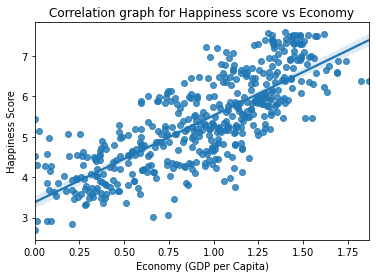

In [11]:
sns.regplot(data = econ_corr, x = 'Economy (GDP per Capita)', y = 'Happiness Score').set_title("Correlation graph for Happiness score vs Economy")

## Regression plot
For regression plot you can just use sns.regplot and input in 3 components.
1. Data
2. What to put on x axis
3. What to put on y axis

We then set a title using set_title

Text(0.5, 1.0, 'Correlation graph for Happiness score vs Family')

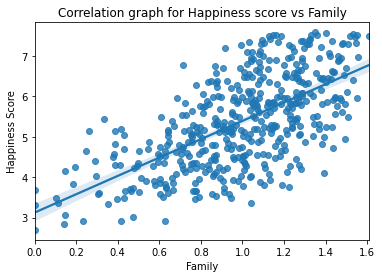

In [ ]:
sns.regplot(data=fam_happiness_corr, x='Family', y='Happiness Score').set_title("Correlation graph for Happiness score vs Family")

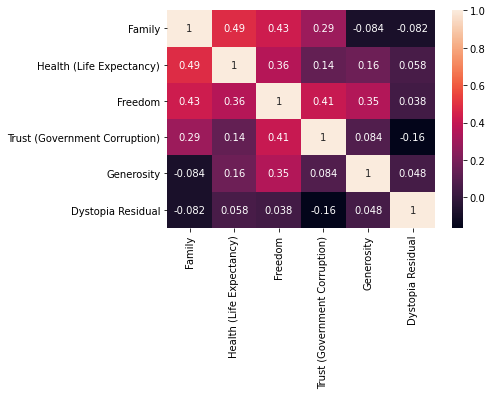

In [ ]:
df_group = data[['Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']]
corr_mat = df_group.corr()

import seaborn as sns
sns.heatmap(corr_mat, annot=True)
plt.show()